In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn import linear_model
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'E:\INCEPTEZ\Training\Basics_python\Vehicle_Sales_Data.xlsx')

In [3]:
df.head(3)

,Vehicle Full Code,Vehicle Code,OEM Model Name,SIAM Company Code,SIAM Segment 1,SIAM Segment 2,SIAM Fuel,Month,Year,Production Qty,Domestic Sale,Export Sale,Category,Category Name,YrMth
0,HMPVF2U4DI,PV,PAJRO SFX,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,01-11-2012
1,HMORF2U4DI,OR,OUTLANDER,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,01-11-2012
2,SKOAP3EEDI,OA,Octavia,SKODAAUTO INDIA PVT LTD,Premium Car 3,Executive,DIESEL,NOV,2012,0,0,0,PVPC,Passenger car PV,01-11-2012


In [4]:
df['YrMth'].value_counts()

01-05-2013    345
01-11-2013    330
01-07-2013    324
01-02-2013    324
01-01-2013    324
             ... 
01-04-2014    168
01-05-2019    166
01-11-2018    164
01-04-2019    162
01-01-2019    147
Name: YrMth, Length: 93, dtype: int64

In [220]:
df.columns

Index(['Vehicle Full Code', 'Vehicle Code', 'OEM Model Name',
       'SIAM Company Code', 'SIAM Segment 1', 'SIAM Segment 2', 'SIAM Fuel',
       'Month', 'Year', 'Production Qty', 'Domestic Sale', 'Export Sale',
       'Category', 'Category Name', 'YrMth'],
      dtype='object')

In [221]:
df = df.drop(columns=['Vehicle Full Code', 'Vehicle Code', 'OEM Model Name',
       'SIAM Company Code', 'SIAM Segment 1', 'SIAM Segment 2', 'SIAM Fuel',
        'Month', 'Production Qty','Category Name',
       'Category'])

In [227]:
df = df.drop(columns=['Year'])

In [230]:
df.tail()

,Domestic Sale,YrMth
19661,25,2019-01-01
19662,321,2019-01-01
19663,0,2019-01-01
19664,1635,2019-01-01
19665,450,2019-01-02


In [231]:
df['YrMth'] = pd.to_datetime(df['YrMth'])

In [232]:
df.tail()

,Domestic Sale,YrMth
19661,25,2019-01-01
19662,321,2019-01-01
19663,0,2019-01-01
19664,1635,2019-01-01
19665,450,2019-01-02


In [210]:
# set month column as index

In [233]:
df.set_index('YrMth',inplace=True)

In [234]:
df

,Domestic Sale
YrMth,
2012-01-11,0
2012-01-11,0
2012-01-11,0
2012-01-11,6
2012-01-05,0
...,...
2019-01-01,25
2019-01-01,321
2019-01-01,0


### Visualize the data

<AxesSubplot:xlabel='YrMth'>

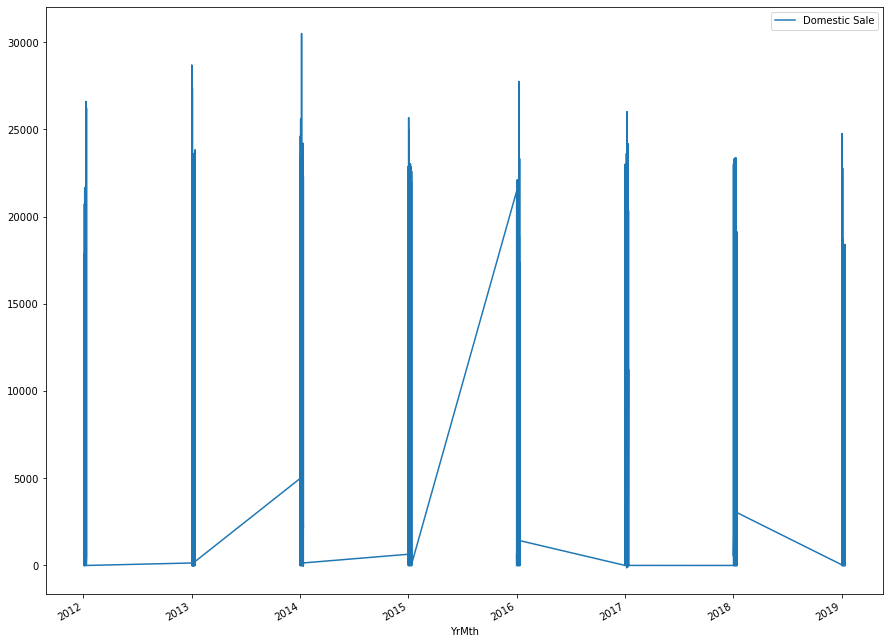

In [237]:
df.plot(figsize=(15,12))

In [238]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [240]:
test_result=adfuller(df['Domestic Sale'])

In [241]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [243]:
adfuller_test(df['Domestic Sale'])

ADF Test Statistic : -21.923103515194228
p-value : 0.0
#Lags Used : 28
Number of Observations Used : 19637
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In [245]:
df['Sales First Difference'] = df['Domestic Sale'] - df['Domestic Sale'].shift(1)

In [246]:
df['Domestic Sale'].shift(1)

YrMth
2012-01-11       NaN
2012-01-11       0.0
2012-01-11       0.0
2012-01-11       0.0
2012-01-05       6.0
               ...  
2019-01-01       0.0
2019-01-01      25.0
2019-01-01     321.0
2019-01-01       0.0
2019-01-02    1635.0
Name: Domestic Sale, Length: 19666, dtype: float64

In [247]:
df['Seasonal First Difference']=df['Domestic Sale']-df['Domestic Sale'].shift(12)

In [248]:
df.head(14)

,Domestic Sale,Sales First Difference,Seasonal First Difference
YrMth,,,
2012-01-11,0,NaN,NaN
2012-01-11,0,0.0,NaN
2012-01-11,0,0.0,NaN
2012-01-11,6,6.0,NaN
2012-01-05,0,-6.0,NaN
2012-01-05,15,15.0,NaN
2012-01-05,0,-15.0,NaN
2012-01-05,67,67.0,NaN
2012-01-05,9,-58.0,NaN


In [249]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -36.725642401988985
p-value : 0.0
#Lags Used : 36
Number of Observations Used : 19617
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='YrMth'>

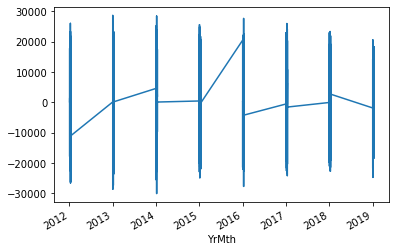

In [250]:
df['Seasonal First Difference'].plot()

In [258]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

NameError: name 'statsmodels' is not defined

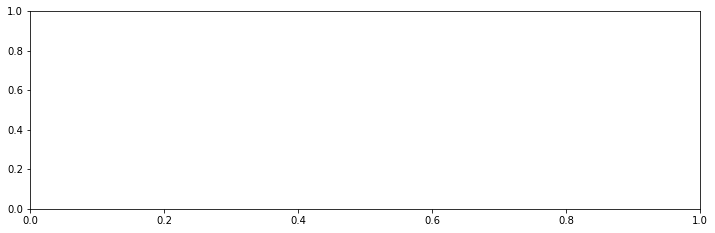

In [260]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [261]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [264]:
model=ARIMA(df['Domestic Sale'],order=(1,1,1))
model_fit=model.fit()

MemoryError: Unable to allocate 2.87 GiB for an array with shape (19620, 19620) and data type float64

In [ ]:
model_fit.summary()